In [51]:
import pandas as pd
from sklearn.impute import SimpleImputer
from scipy.stats import zscore

In [52]:
eter = pd.read_csv('transaction_dataset.csv')

# Data Profiling/Understanding

In [53]:
eter = eter.drop(['Unnamed: 0', 'Index'], axis=1)
eter.head()

,Address,FLAG,Avg min between sent tnx,Avg min between received tnx,Time Diff between first and last (Mins),Sent tnx,Received Tnx,Number of Created Contracts,Unique Received From Addresses,Unique Sent To Addresses,min value received,max value received,avg val received,min val sent,max val sent,avg val sent,min value sent to contract,max val sent to contract,avg value sent to contract,total transactions (including tnx to create contract,total Ether sent,total ether received,total ether sent contracts,total ether balance,Total ERC20 tnxs,ERC20 total Ether received,ERC20 total ether sent,ERC20 total Ether sent contract,ERC20 uniq sent addr,ERC20 uniq rec addr,ERC20 uniq sent addr.1,ERC20 uniq rec contract addr,ERC20 avg time between sent tnx,ERC20 avg time between rec tnx,ERC20 avg time between rec 2 tnx,ERC20 avg time between contract tnx,ERC20 min val rec,ERC20 max val rec,ERC20 avg val rec,ERC20 min val sent,ERC20 max val sent,ERC20 avg val sent,ERC20 min val sent contract,ERC20 max val sent contract,ERC20 avg val sent contract,ERC20 uniq sent token name,ERC20 uniq rec token name,ERC20 most sent token type,ERC20_most_rec_token_type
0,0x00009277775ac7d0d59eaad8fee3d10ac6c805e8,0,844.26,1093.71,704785.63,721,89,0,40,118,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,0.0,0.0,0.0,810,865.691093,586.466675,0.0,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,0.0,58.0,0.0,0.0,0.0,0.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,0.0,0.0,39.0,57.0,Cofoundit,Numeraire
1,0x0002b44ddb1476db43c868bd494422ee4c136fed,0,12709.07,2958.44,1218216.73,94,8,0,5,14,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,0.0,0.0,0.0,102,3.087297,3.085478,0.0,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,0.0,0.0,0.0,1.0,7.0,Livepeer Token,Livepeer Token
2,0x0002bda54cb772d040f779e88eb453cac0daa244,0,246194.54,2434.02,516729.30,2,10,0,10,2,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,0.0,0.0,0.0,12,3.588616,3.589057,0.0,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,8.0,None,XENON
3,0x00038e6ba2fd5c09aedb96697c8d7b8fa6632e5e,0,10219.60,15785.09,397555.90,25,9,0,7,13,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,0.0,0.0,0.0,34,1750.045862,895.399559,0.0,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,0.0,0.0,0.0,1.0,11.0,Raiden,XENON
4,0x00062d1dd1afb6fb02540ddad9cdebfe568e0d89,0,36.61,10707.77,382472.42,4598,20,1,7,19,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,0.0,0.0,0.0,4619,104.318883,53.421897,0.0,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,0.0,0.0,0.0,6.0,27.0,StatusNetwork,EOS


In [54]:
eter.columns

Index(['Address', 'FLAG', 'Avg min between sent tnx',
       'Avg min between received tnx',
       'Time Diff between first and last (Mins)', 'Sent tnx', 'Received Tnx',
       'Number of Created Contracts', 'Unique Received From Addresses',
       'Unique Sent To Addresses', 'min value received', 'max value received ',
       'avg val received', 'min val sent', 'max val sent', 'avg val sent',
       'min value sent to contract', 'max val sent to contract',
       'avg value sent to contract',
       'total transactions (including tnx to create contract',
       'total Ether sent', 'total ether received',
       'total ether sent contracts', 'total ether balance',
       ' Total ERC20 tnxs', ' ERC20 total Ether received',
       ' ERC20 total ether sent', ' ERC20 total Ether sent contract',
       ' ERC20 uniq sent addr', ' ERC20 uniq rec addr',
       ' ERC20 uniq sent addr.1', ' ERC20 uniq rec contract addr',
       ' ERC20 avg time between sent tnx', ' ERC20 avg time between rec tn

In [55]:
eter.shape

(9841, 49)

In [56]:
eter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9841 entries, 0 to 9840
Data columns (total 49 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Address                                               9841 non-null   object 
 1   FLAG                                                  9841 non-null   int64  
 2   Avg min between sent tnx                              9841 non-null   float64
 3   Avg min between received tnx                          9841 non-null   float64
 4   Time Diff between first and last (Mins)               9841 non-null   float64
 5   Sent tnx                                              9841 non-null   int64  
 6   Received Tnx                                          9841 non-null   int64  
 7   Number of Created Contracts                           9841 non-null   int64  
 8   Unique Received From Addresses                        9841

In [57]:
for col in eter.columns:
    if eter[col].isna().sum() > 0:
        print(col, eter[col].isna().sum())

 Total ERC20 tnxs 829
 ERC20 total Ether received 829
 ERC20 total ether sent 829
 ERC20 total Ether sent contract 829
 ERC20 uniq sent addr 829
 ERC20 uniq rec addr 829
 ERC20 uniq sent addr.1 829
 ERC20 uniq rec contract addr 829
 ERC20 avg time between sent tnx 829
 ERC20 avg time between rec tnx 829
 ERC20 avg time between rec 2 tnx 829
 ERC20 avg time between contract tnx 829
 ERC20 min val rec 829
 ERC20 max val rec 829
 ERC20 avg val rec 829
 ERC20 min val sent 829
 ERC20 max val sent 829
 ERC20 avg val sent 829
 ERC20 min val sent contract 829
 ERC20 max val sent contract 829
 ERC20 avg val sent contract 829
 ERC20 uniq sent token name 829
 ERC20 uniq rec token name 829
 ERC20 most sent token type 841
 ERC20_most_rec_token_type 851


In [58]:
eter.dtypes

Address                                                  object
FLAG                                                      int64
Avg min between sent tnx                                float64
Avg min between received tnx                            float64
Time Diff between first and last (Mins)                 float64
Sent tnx                                                  int64
Received Tnx                                              int64
Number of Created Contracts                               int64
Unique Received From Addresses                            int64
Unique Sent To Addresses                                  int64
min value received                                      float64
max value received                                      float64
avg val received                                        float64
min val sent                                            float64
max val sent                                            float64
avg val sent                            

# Data Cleaning

In [59]:
cols = []
for col in eter.columns:
    if col[0] == ' ':
        col = col.replace(' ','',1)
    col = col.replace(' ','_')
    cols.append(col)
eter.columns = cols

In [60]:
numerical_cols = [col for col in eter.columns if eter[col].dtype in ['float64', 'int64']]
cat_cols = [col for col in eter.columns if eter[col].dtype not in ['float64', 'int64'] and col != 'Address']

In [61]:
#Replacing missing values in numerical columns by their medians
num_imputer = SimpleImputer(strategy='median')
eter[numerical_cols] = pd.DataFrame(num_imputer.fit_transform(eter[numerical_cols]))

#Replacing missing values in categorical columns by the most frequent value
cat_imputer = SimpleImputer(strategy='most_frequent')
eter[cat_cols] = pd.DataFrame(cat_imputer.fit_transform(eter[cat_cols]))

In [62]:
#There are duplicates
eter.duplicated().any()

True

In [63]:
eter = eter.drop_duplicates()
eter.shape

(9823, 49)

In [64]:
#The datasets is full of outliers
eter.describe()

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
count,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9.823000e+03,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.0,9823.0,9823.0,9823.0,9823.000000,9.823000e+03,9.823000e+03,9.823000e+03,9.823000e+03,9.823000e+03,9823.0,9823.0,9823.0,9823.000000,9823.000000
mean,0.221826,5092.595652,8011.602499,2.184347e+05,116.074417,163.972106,3.736537,30.406495,25.868472,43.785903,523.692459,100.638887,4.806480,314.528353,44.638924,0.000003,0.000008,0.000005,283.783060,1.017806e+04,1.165818e+04,0.000008,1.480124e+03,33.314262,1.189185e+08,1.272119e+07,101.779918,5.170213,7.047134,0.003156,4.570803,0.0,0.0,0.0,0.0,445.458962,1.149112e+08,3.987372e+06,1.077187e+04,1.195787e+07,5.796714e+06,0.0,0.0,0.0,1.264990,4.501985
std,0.415496,21505.395360,23097.130771,3.229212e+05,757.890300,941.675903,141.575042,298.892226,264.058187,326.137833,13020.716151,2887.614225,138.736510,6635.215478,239.127317,0.000226,0.000516,0.000324,1353.589778,3.586507e+05,3.645380e+05,0.000516,2.426474e+05,428.756168,1.009419e+10,1.130614e+09,5870.244074,100.825418,78.386450,0.062934,16.530962,0.0,0.0,0.0,0.0,16171.792826,1.009306e+10,2.050924e+08,1.009139e+06,1.130149e+09,5.665340e+08,0.0,0.0,0.0,6.442067,15.987019
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,-1.560535e+07,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.171250e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424921,0.000000,0.160818,0.085688,0.000000,0.000000,0.000000,4.000000,2.251911e-01,2.674521e+00,0.000000,6.207450e-04,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,17.340000,513.420000,4.695758e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095006,6.000000,1.724272,0.049139,4.999276,1.599475,0.000000,0.000000,0.000000,8.000000,1.244669e+01,3.050000e+01,0.000000,1.722000e-03,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,564.305000,5494.510000,3.041145e+05,11.000000,27.000000,0.000000,5.000000,3.000000,2.000000,66.992806,22.000000,0.998800,61.337946,21.999380,0.00

In [65]:
def replace_outliers(df, col, Z=3):
    
    df['zscore'] = zscore(df[col])
    
    #Replace outliers with the columns' median without taking in count the outliers
    med = df[(df['zscore']>-Z) & (df['zscore']<Z)][col].median()
    df.loc[(df['zscore']<-Z) | (df['zscore']>Z), col] = med
    
    df = df.drop('zscore', axis = 1)
    
    return df

#'A Z-score is a numerical measurement that describes a value's relationship to the mean of a group of values.'
#'If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points. Such a data point can be an outlier.'

In [66]:
for col in numerical_cols:
    eter = replace_outliers(eter, col, Z=3)

In [67]:
pd.set_option('display.max_columns', None)
eter.describe()

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,min_value_sent_to_contract,max_val_sent_to_contract,avg_value_sent_to_contract,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_sent_contracts,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_sent_addr.1,ERC20_uniq_rec_contract_addr,ERC20_avg_time_between_sent_tnx,ERC20_avg_time_between_rec_tnx,ERC20_avg_time_between_rec_2_tnx,ERC20_avg_time_between_contract_tnx,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_min_val_sent_contract,ERC20_max_val_sent_contract,ERC20_avg_val_sent_contract,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
count,9823.000000,9823.000000,9823.000000,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.000000,9823.0,9823.0,9823.0,9823.000000,9.823000e+03,9.823000e+03,9823.0,9823.000000,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9823.000000,9823.000000,9823.0,9823.000000,9823.0,9823.0,9823.0,9823.0,9823.000000,9.823000e+03,9.823000e+03,9823.000000,9.823000e+03,9.823000e+03,9823.0,9823.0,9823.0,9823.000000,9823.000000
mean,0.221826,2576.607157,5314.539823,1.981567e+05,42.318844,59.787030,0.150361,8.102820,7.721979,31.151844,181.332282,64.339480,2.440488,156.439668,35.903142,0.0,0.0,0.0,102.948895,1.472330e+03,1.955107e+03,0.0,53.917509,11.282500,1.711452e+07,1.319374e+06,2.446113,1.418609,4.124707,0.0,3.106383,0.0,0.0,0.0,0.0,64.609942,1.310933e+07,6.888983e+05,591.678182,5.560628e+05,8.078622e+04,0.0,0.0,0.0,0.609895,3.044487
std,0.415496,7952.221510,11217.775280,2.873929e+05,173.733094,215.730562,0.614999,39.544616,34.509354,119.992501,1055.806758,276.342625,11.321555,784.710186,120.401270,0.0,0.0,0.0,361.819303,1.918607e+04,2.619056e+04,0.0,13140.250720,52.325551,3.003446e+08,3.627875e+07,163.605211,8.272607,12.893460,0.0,7.442468,0.0,0.0,0.0,0.0,1054.030475,2.657583e+08,1.477950e+07,18828.751937,1.572071e+07,5.130547e+06,0.0,0.0,0.0,2.314622,7.232979
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.0,-540805.830400,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,3.171250e+02,1.000000,1.000000,0.000000,1.000000,1.000000,0.001000,1.000000,0.424921,0.000000,0.160818,0.085688,0.0,0.0,0.0,4.000000,2.251911e-01,2.674521e+00,0.0,0.000630,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,0.000000
50%,0.000000,15.600000,431.180000,4.163088e+04,3.000000,4.000000,0.000000,2.000000,2.000000,0.095000,5.999516,1.713252,0.049087,4.998489,1.571920,0.0,0.0,0.0,8.000000,1.233406e+01,3.032365e+01,0.0,0.001722,1.000000,1.000000e-12,0.000000e+00,0.000000,0.000000,1.000000,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.000000,1.000000
75%,0.000000,341.535000,4745.380000,2.914142e+05,10.000000,24.000000,0.000000,5.000000,3.000000,1.995000,66.531772,21.942021,0.998747,60.621314,20.996598,0.0,0.0,0.0,44.000000,1.009990e+02,1.010000e+02,0.0,0.043779,2.000000,2.161850e+01,0.000000e+00,0.000000,0.000000,2.000000,0.0,2.000000,0.0,0.0,0.0,0.0,0.000000,1.863981e+01,1.337000e+01,0.000000,0.000000e

In [68]:
cols_to_drop = ['ERC20_min_val_sent_contract', 'ERC20_max_val_sent_contract',
               'ERC20_avg_val_sent_contract','min_value_sent_to_contract',
               'max_val_sent_to_contract','avg_value_sent_to_contract',
               'total_ether_sent_contracts','ERC20_uniq_sent_addr.1',
               'ERC20_avg_time_between_sent_tnx', 'ERC20_avg_time_between_rec_tnx',
               'ERC20_avg_time_between_rec_2_tnx','ERC20_avg_time_between_contract_tnx',
               'ERC20_most_sent_token_type', 'ERC20_most_rec_token_type', 'Address']
eter.drop(cols_to_drop, axis=1, inplace=True)

In [69]:
eter.shape

(9823, 34)

In [70]:
eter.head()

,FLAG,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Time_Diff_between_first_and_last_(Mins),Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name
0,0.0,844.26,1093.71,704785.630,721.0,89.0,0.0,40.0,118.0,0.000000,45.806785,6.589513,0.00,31.220000,1.200681,810.0,865.691093,586.466675,-279.224419,265.0,3.558854e+07,3.560317e+07,0.0,30.0,54.0,1.0,0.0,1.500000e+07,265586.147600,0.000000,1.683100e+07,271779.920000,0.0,1.0
1,0.0,12709.07,2958.44,41630.885,94.0,8.0,0.0,5.0,14.0,0.000000,2.613269,0.385685,0.00,1.800000,0.032844,102.0,3.087297,3.085478,-0.001819,8.0,4.034283e+02,2.260809e+00,0.0,1.0,5.0,7.0,0.0,3.650000e+02,57.632615,2.260809,2.260809e+00,2.260809,1.0,7.0
2,0.0,15.60,2434.02,516729.300,2.0,10.0,0.0,10.0,2.0,0.113119,1.165453,0.358906,0.05,3.538616,1.794308,12.0,3.588616,3.589057,0.000441,8.0,5.215121e+02,0.000000e+00,0.0,0.0,7.0,8.0,0.0,4.428198e+02,65.189009,0.000000,0.000000e+00,0.000000,0.0,8.0
3,0.0,10219.60,15785.09,397555.900,25.0,9.0,0.0,7.0,13.0,0.000000,500.000000,99.488840,0.00,450.000000,70.001834,34.0,1750.045862,895.399559,-854.646303,14.0,1.711105e+04,1.141223e+04,0.0,2.0,11.0,11.0,0.0,1.141223e+04,1555.550174,100.000000,9.029231e+03,3804.076893,1.0,11.0
4,0.0,36.61,10707.77,382472.420,3.0,20.0,1.0,7.0,19.0,0.000000,12.802411,2.671095,0.00,9.000000,0.022688,8.0,104.318883,53.421897,-50.896986,42.0,1.628297e+05,1.235399e+05,0.0,4.0,23.0,27.0,0.0,9.000000e+04,4934.232147,0.000000,4.500000e+04,13726.659220,6.0,27.0


In [71]:
#Due to the high numbers in Time_Diff_between_first_and_last_(Mins), we will convert this column to days

eter['Days_Diff_between_first_and_last'] = round(eter['Time_Diff_between_first_and_last_(Mins)']/1440,1)
eter.drop('Time_Diff_between_first_and_last_(Mins)', axis=1, inplace=True)

Smart contract - self-executing contract with the terms of the agreement between buyer and seller written into lines of code. A smart contract is responsible for creating tokens, managing transactions and keeping tracks of transactions <br>
<br>
ERC-20 is the standard for creating tokens and most tokens around Ethereum are based on that standard. It defines 6 mandatory functions and 3 optional that your smart contract should implement like the token's name, its symbol etc. ERC20 is like a guideline for building contracts <br>
<br>
ETH is the currency for Etherium networks. Ether is the transactional token that facilitates operations on the Ethereum network. To buy some tokens you have to send some ether to the token contract.


# Data Viz

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:>

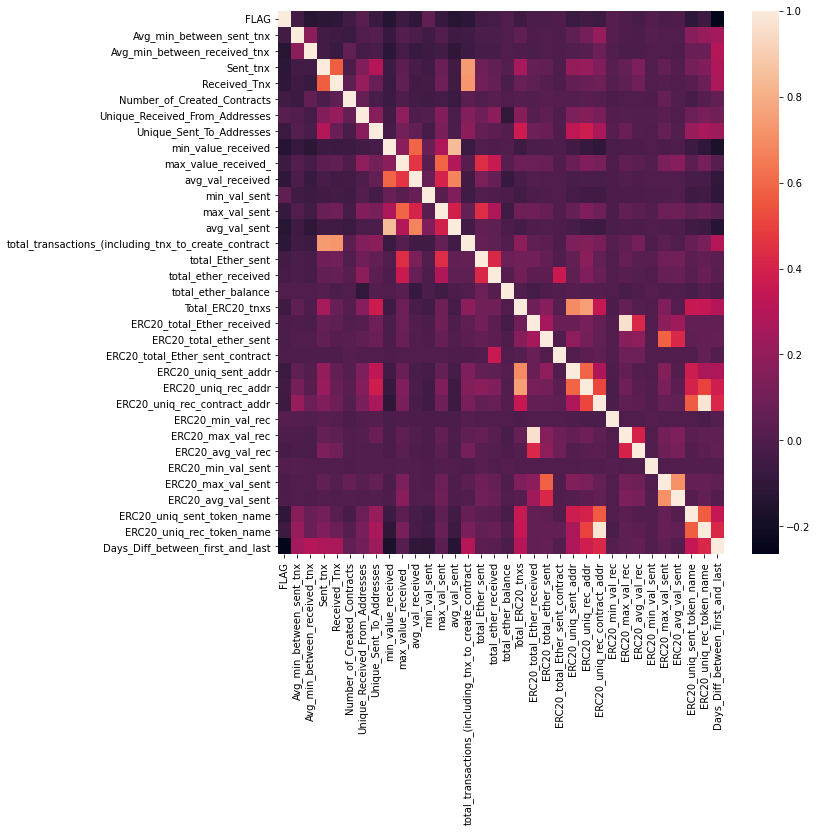

In [73]:
plt.subplots(figsize=(10,10))
sns.heatmap(eter.corr())

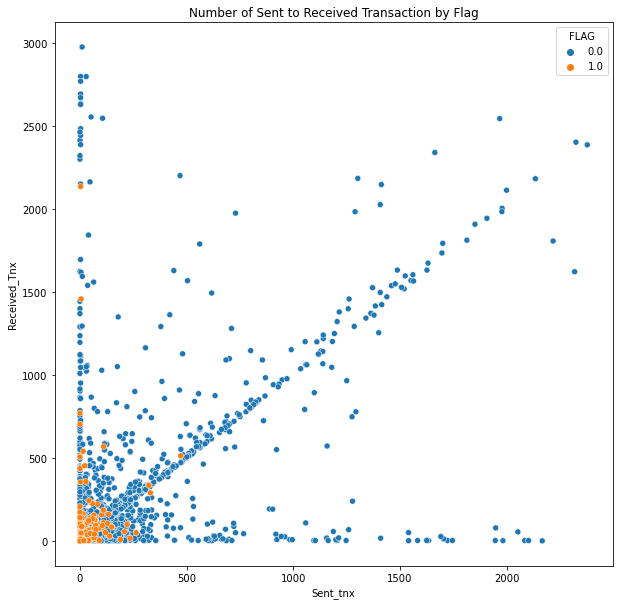

In [74]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
sns.scatterplot(data=eter, x='Sent_tnx', y='Received_Tnx', hue='FLAG', ax=ax)
plt.title('Number of Sent to Received Transaction by Flag')
plt.show()
plt.close()
#We see below that addresses with lower amount of transactions are more likely to be subject to fraudulent transaction.

In [75]:
eter['FLAG'].value_counts()

0.0    7644
1.0    2179
Name: FLAG, dtype: int64

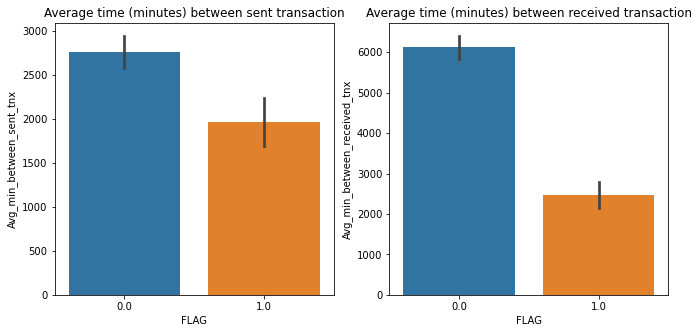

In [76]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5))#, sharey=True)

sns.barplot(x='FLAG', y='Avg_min_between_sent_tnx', data=eter, ax=ax1)
sns.barplot(x='FLAG', y='Avg_min_between_received_tnx', data=eter, ax=ax2)

ax1.set_title('Average time (minutes) between sent transaction')
ax2.set_title('Average time (minutes) between received transaction')

plt.show()
plt.close()

We notice that a transaction is flagged as fraudulent for transactions that happen in shorter periods of time

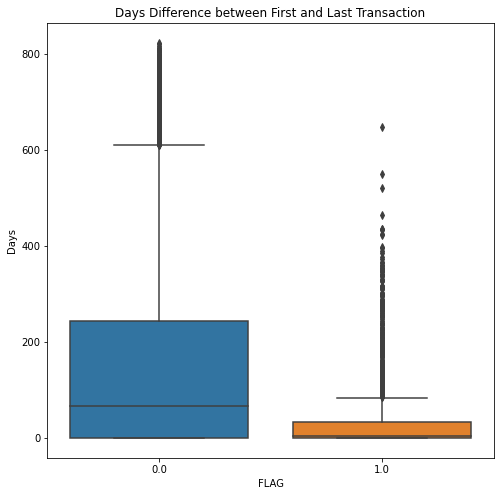

In [77]:
plt.subplots(figsize=(8,8))
sns.boxplot(x='FLAG', y='Days_Diff_between_first_and_last', data=eter)
plt.title('Days Difference between First and Last Transaction')
plt.ylabel('Days')
plt.show()
plt.close()

Similar to what we realized in the previous bar plot, a transaction is flagged as fraudulent more frequently when the number of days between the first and last transaction is shorter. 

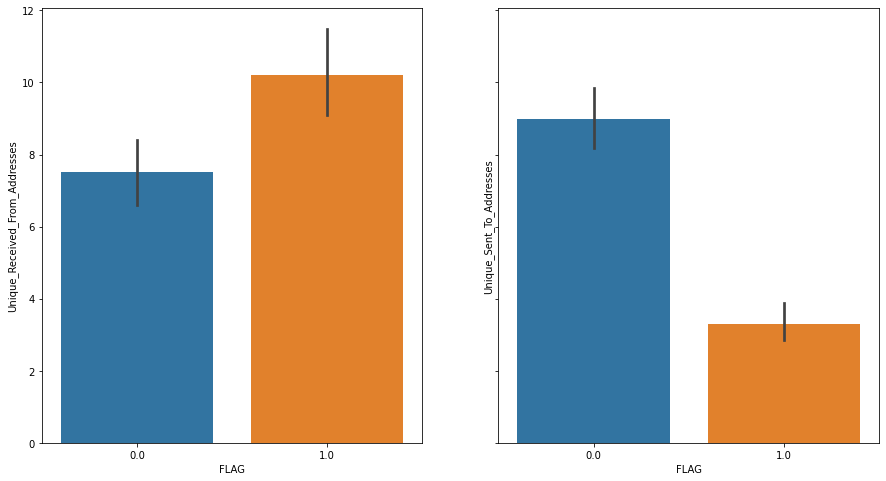

In [78]:
fig, ax = plt.subplots(1,2, figsize=(15,8), sharey=True)

sns.barplot(data=eter, y='Unique_Received_From_Addresses', x='FLAG', ax=ax[0])
sns.barplot(data=eter, y='Unique_Sent_To_Addresses', x='FLAG', ax=ax[1])
plt.show()
plt.close()

An interesting aspect from the above graph is that the higher the number of transactions from different addresses, the higher the chances of the transaction being a fraud.

<AxesSubplot:xlabel='FLAG', ylabel='total_transactions_(including_tnx_to_create_contract'>

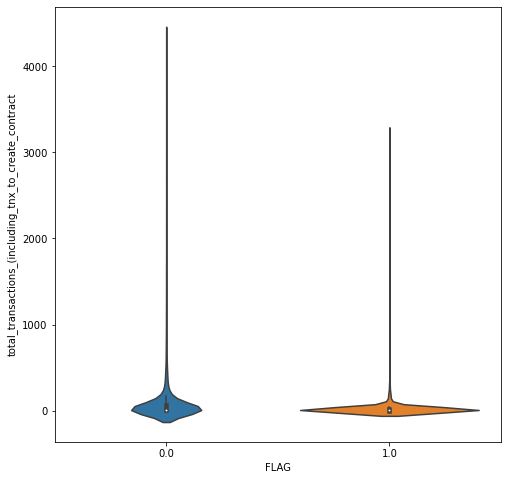

In [79]:
plt.subplots(figsize=(8,8))
sns.violinplot(data=eter, y='total_transactions_(including_tnx_to_create_contract', x='FLAG')

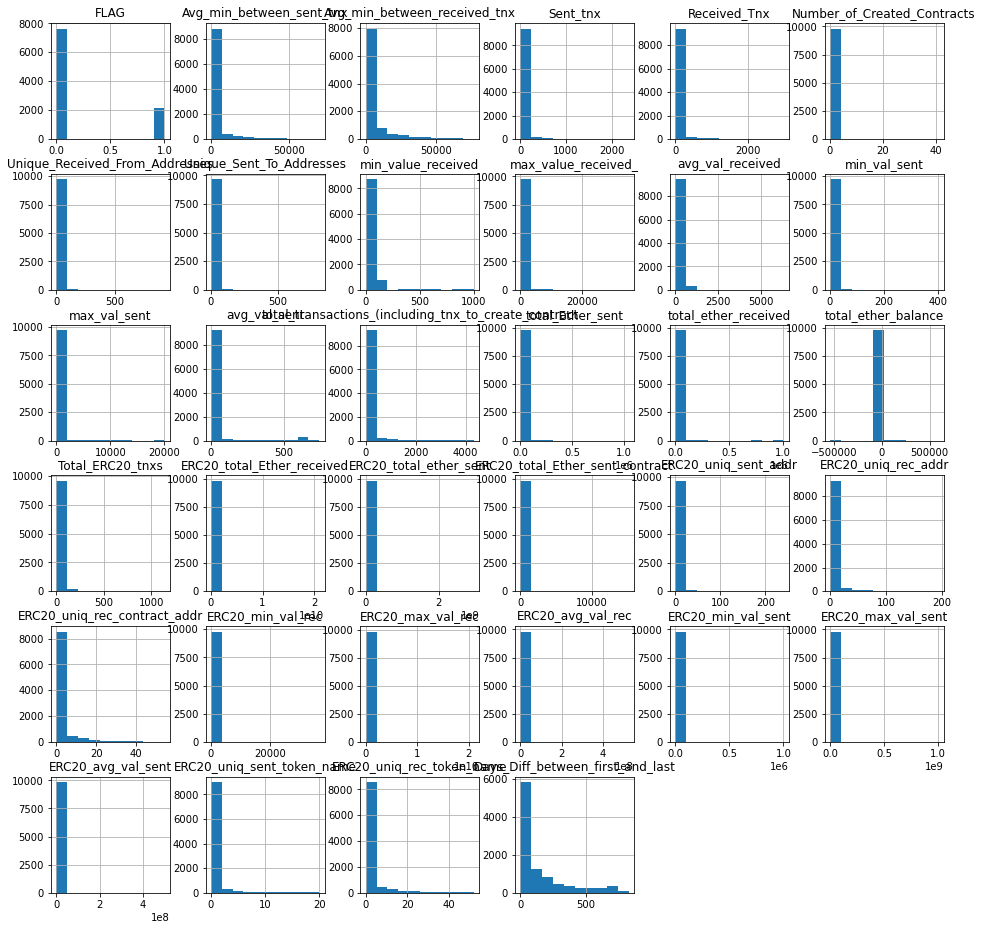

In [80]:
eter.hist(figsize=(16, 16))
plt.show()
plt.close()

Because most of the features are all skewed, even after removing outliers, we will log transform them.

# Feature Engineering and Selection (Mutual Information - Information Gain)

In [81]:
from sklearn.preprocessing import PowerTransformer #Uses logarithmic function

pt = PowerTransformer()

df = eter.drop('FLAG', axis=1)

df = pd.DataFrame(pt.fit_transform(df), columns=df.columns)

df.head()

,Avg_min_between_sent_tnx,Avg_min_between_received_tnx,Sent_tnx,Received_Tnx,Number_of_Created_Contracts,Unique_Received_From_Addresses,Unique_Sent_To_Addresses,min_value_received,max_value_received_,avg_val_received,min_val_sent,max_val_sent,avg_val_sent,total_transactions_(including_tnx_to_create_contract,total_Ether_sent,total_ether_received,total_ether_balance,Total_ERC20_tnxs,ERC20_total_Ether_received,ERC20_total_ether_sent,ERC20_total_Ether_sent_contract,ERC20_uniq_sent_addr,ERC20_uniq_rec_addr,ERC20_uniq_rec_contract_addr,ERC20_min_val_rec,ERC20_max_val_rec,ERC20_avg_val_rec,ERC20_min_val_sent,ERC20_max_val_sent,ERC20_avg_val_sent,ERC20_uniq_sent_token_name,ERC20_uniq_rec_token_name,Days_Diff_between_first_and_last
0,1.063857,0.498543,1.970641,1.361984,-0.398647,2.019618,2.204723,-0.779819,0.825907,0.471682,-0.811968,0.727936,-0.337290,1.858847,1.398173,1.208274,-0.026458,1.944319,1.861752,2.522813,-0.031861,2.413417,1.918249,0.282899,-0.495923,1.858645,1.851913,-0.267390,2.519938,2.516822,-0.407628,0.285659,1.303653
1,1.532562,0.764448,1.596898,0.264172,-0.398647,0.659715,1.493675,-0.779819,-0.469180,-0.906073,-0.811968,-0.493736,-1.101992,1.161767,-0.496099,-0.814038,-0.005489,1.351292,1.458278,1.252401,-0.031861,2.174996,1.273919,1.464834,-0.495923,1.483998,1.367186,3.803632,1.320719,1.514645,2.396095,1.468997,0.142197
2,0.024957,0.711747,-0.190606,0.393397,-0.398647,1.220610,0.182699,-0.559253,-0.814486,-0.927349,-0.617153,-0.204362,-0.134883,0.081510,-0.439855,-0.756098,-0.005489,1.351292,1.489680,-0.407784,-0.031861,-0.430298,1.428626,1.518129,-0.495923,1.507383,1.391213,-0.267390,-0.407886,-0.407557,-0.407628,1.522287,1.172549
3,1.500508,1.228139,1.167335,0.333008,-0.398647,0.945024,1.455732,-0.779819,1.567856,1.451924,-0.811968,1.536304,1.440900,0.657087,1.563153,1.343389,-0.069466,1.546270,1.742283,2.518867,-0.031861,2.357500,1.596886,1.629479,-0.495923,1.743773,1.735695,3.878214,2.516932,2.515189,2.396095,1.633597,1.062475
4,0.285498,1.118823,0.056857,0.759803,2.508436,0.945024,1.639063,-0.779819,0.287972,-0.014816,-0.811968,0.214330,-1.113377,-0.164647,0.803818,0.347866,-0.009329,1.784610,1.808172,2.522092,-0.031861,2.404430,1.788460,1.843667,-0.495923,1.805799,1.785278,-0.267390,2.519051,2.516335,2.494426,1.847544,1.046232


In [82]:
from sklearn.feature_selection import mutual_info_classif

X = df.copy()
y = eter['FLAG']


mi_scores = mutual_info_classif(X,y)
mi_scores = pd.Series(mi_scores, name = 'MI Scores', index=X.columns)
mi_scores

Avg_min_between_sent_tnx                                0.099084
Avg_min_between_received_tnx                            0.103823
Sent_tnx                                                0.058633
Received_Tnx                                            0.111301
Number_of_Created_Contracts                             0.000000
Unique_Received_From_Addresses                          0.124377
Unique_Sent_To_Addresses                                0.042089
min_value_received                                      0.103265
max_value_received_                                     0.183370
avg_val_received                                        0.176195
min_val_sent                                            0.041964
max_val_sent                                            0.081499
avg_val_sent                                            0.079531
total_transactions_(including_tnx_to_create_contract    0.123910
total_Ether_sent                                        0.097118
total_ether_received     

In [83]:
mi_scores = mi_scores.sort_values(ascending=True)

In [84]:
cols_of_interest = [c for c in mi_scores.index if mi_scores[c] > 0.05]

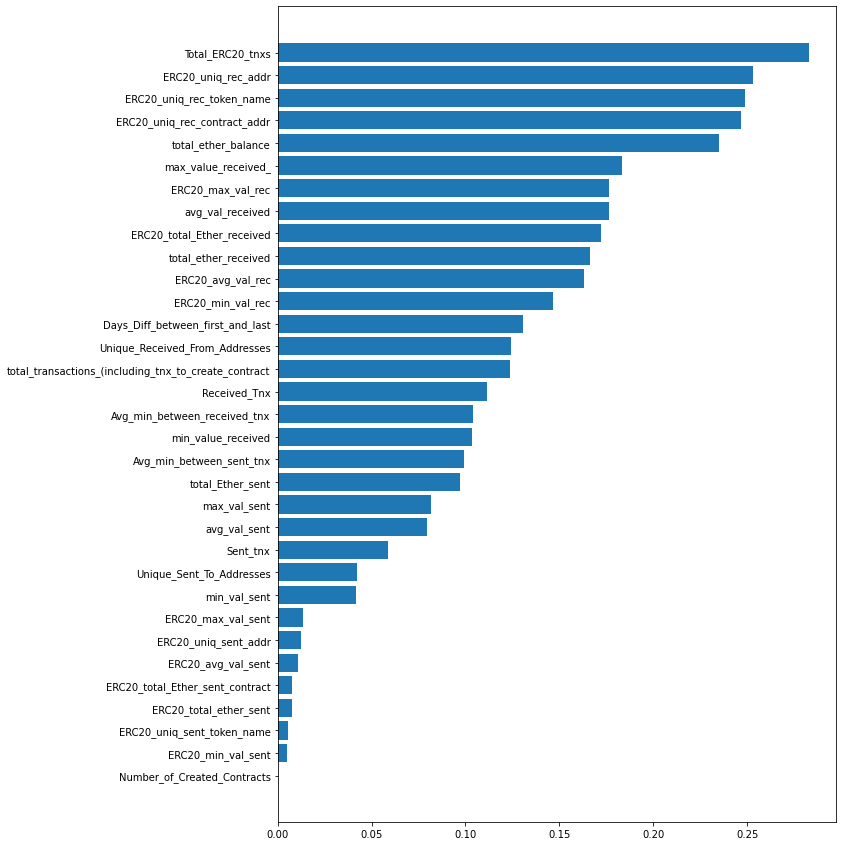

In [85]:
import numpy as np
plt.figure(figsize=(10,15))
width = np.arange(len(mi_scores))
ticks = list(mi_scores.index)
plt.barh(width,mi_scores)
plt.yticks(width, ticks)
plt.show()
plt.close()

In [86]:
df['FLAG'] = eter['FLAG']

<AxesSubplot:xlabel='FLAG', ylabel='Total_ERC20_tnxs'>

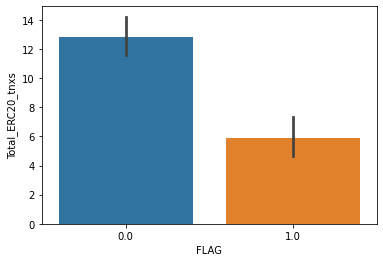

In [87]:
sns.barplot(data=eter, x='FLAG', y='Total_ERC20_tnxs')

# Models
Logistic Regression and Tree based algorithms such as Decision Tree, Random forest and gradient boosting, are not sensitive to the magnitude of variables. So standardization is not needed before fitting this kind of models

In [88]:
cols_of_interest.append('FLAG')

In [89]:
df = df[cols_of_interest]
df.head()

,Sent_tnx,avg_val_sent,max_val_sent,total_Ether_sent,Avg_min_between_sent_tnx,min_value_received,Avg_min_between_received_tnx,Received_Tnx,total_transactions_(including_tnx_to_create_contract,Unique_Received_From_Addresses,Days_Diff_between_first_and_last,ERC20_min_val_rec,ERC20_avg_val_rec,total_ether_received,ERC20_total_Ether_received,avg_val_received,ERC20_max_val_rec,max_value_received_,total_ether_balance,ERC20_uniq_rec_contract_addr,ERC20_uniq_rec_token_name,ERC20_uniq_rec_addr,Total_ERC20_tnxs,FLAG
0,1.970641,-0.337290,0.727936,1.398173,1.063857,-0.779819,0.498543,1.361984,1.858847,2.019618,1.303653,-0.495923,1.851913,1.208274,1.861752,0.471682,1.858645,0.825907,-0.026458,0.282899,0.285659,1.918249,1.944319,0.0
1,1.596898,-1.101992,-0.493736,-0.496099,1.532562,-0.779819,0.764448,0.264172,1.161767,0.659715,0.142197,-0.495923,1.367186,-0.814038,1.458278,-0.906073,1.483998,-0.469180,-0.005489,1.464834,1.468997,1.273919,1.351292,0.0
2,-0.190606,-0.134883,-0.204362,-0.439855,0.024957,-0.559253,0.711747,0.393397,0.081510,1.220610,1.172549,-0.495923,1.391213,-0.756098,1.489680,-0.927349,1.507383,-0.814486,-0.005489,1.518129,1.522287,1.428626,1.351292,0.0
3,1.167335,1.440900,1.536304,1.563153,1.500508,-0.779819,1.228139,0.333008,0.657087,0.945024,1.062475,-0.495923,1.735695,1.343389,1.742283,1.451924,1.743773,1.567856,-0.069466,1.629479,1.633597,1.596886,1.546270,0.0
4,0.056857,-1.113377,0.214330,0.803818,0.285498,-0.779819,1.118823,0.759803,-0.164647,0.945024,1.046232,-0.495923,1.785278,0.347866,1.808172,-0.014816,1.805799,0.287972,-0.009329,1.843667,1.847544,1.788460,1.784610,0.0


### Logistic Regression

In [90]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
from dmba import classificationSummary

X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size=0.2, random_state=42)

logit = LogisticRegression(solver='liblinear')

logit.fit(X_train, y_train)

preds_train = logit.predict(X_train)
logit_preds_valid = logit.predict(X_valid)


print("Accuracy on train is:",accuracy_score(y_train,preds_train))
print("Accuracy on test is:",accuracy_score(y_valid,logit_preds_valid), end='\n\n')

# Precision score Decision Tree .(.train + test set).
print('Precision on the train is:', precision_score(y_train,preds_train))
print('Precision on the test is:', precision_score(y_valid,logit_preds_valid), end='\n\n')

# Recall score Decision Tree .(.train + test set).
print('Recall on the traizn is:', recall_score(y_train,preds_train))
print('Recall on the test is:', recall_score(y_valid,logit_preds_valid), end='\n\n')

# F1_score Decision Tree .(.train + test set).
print('F1 on the train is:', f1_score(y_train,preds_train))
print('F1 on the test is:', f1_score(y_valid,logit_preds_valid))

classificationSummary(y_valid, logit_preds_valid)

Accuracy on train is: 0.9583863578518707
Accuracy on test is: 0.9603053435114504

Precision on the train is: 0.9133409350057012
Precision on the test is: 0.900990099009901

Recall on the traizn is: 0.9015194147439505
Recall on the test is: 0.9054726368159204

F1 on the train is: 0.907391673746814
F1 on the test is: 0.903225806451613
Confusion Matrix (Accuracy 0.9603)

       Prediction
Actual    0    1
     0 1523   40
     1   38  364


In [91]:
pd.DataFrame({'features':X.columns, 'Coeff':logit.coef_[0]}).sort_values(by='Coeff',ascending=False)

,features,Coeff
26,ERC20_avg_val_rec,3.315460
5,Unique_Received_From_Addresses,2.719492
17,Total_ERC20_tnxs,2.198294
8,max_value_received_,1.785220
23,ERC20_uniq_rec_contract_addr,1.471358
24,ERC20_min_val_rec,1.092436
11,max_val_sent,0.996306
12,avg_val_sent,0.720368
22,ERC20_uniq_rec_addr,0.462014
0,Avg_min_between_sent_tnx,0.395713


### Random Forest

In [92]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=500)
rf.fit(X_train, y_train)

preds_train = rf.predict(X_train)
rf_preds_valid = rf.predict(X_valid)


print("Accuracy on train is:",accuracy_score(y_train,preds_train))
print("Accuracy on test is:",accuracy_score(y_valid,rf_preds_valid), end='\n\n')

# Precision score Decision Tree .(.train + test set).
print('Precision on the train is:', precision_score(y_train,preds_train))
print('Precision on the test is:', precision_score(y_valid,rf_preds_valid), end='\n\n')

# Recall score Decision Tree .(.train + test set).
print('Recall on the train is:', recall_score(y_train,preds_train))
print('Recall on the test is:', recall_score(y_valid,rf_preds_valid), end='\n\n')

# F1_score Decision Tree .(.train + test set).
print('F1 on the train is:', f1_score(y_train,preds_train))
print('F1 on the test is:', f1_score(y_valid,rf_preds_valid))

classificationSummary(y_valid, rf_preds_valid)

Accuracy on train is: 1.0
Accuracy on test is: 0.9776081424936387

Precision on the train is: 1.0
Precision on the test is: 0.9735449735449735

Recall on the train is: 1.0
Recall on the test is: 0.9154228855721394

F1 on the train is: 1.0
F1 on the test is: 0.9435897435897436
Confusion Matrix (Accuracy 0.9776)

       Prediction
Actual    0    1
     0 1553   10
     1   34  368


In [93]:
pd.DataFrame({'features':X.columns, 'importance':rf.feature_importances_}).sort_values(by='importance',ascending=False)

,features,importance
32,Days_Diff_between_first_and_last,0.104067
17,Total_ERC20_tnxs,0.103914
22,ERC20_uniq_rec_addr,0.073584
23,ERC20_uniq_rec_contract_addr,0.064148
31,ERC20_uniq_rec_token_name,0.063846
15,total_ether_received,0.061536
1,Avg_min_between_received_tnx,0.045409
5,Unique_Received_From_Addresses,0.042808
13,total_transactions_(including_tnx_to_create_co...,0.041192
8,max_value_received_,0.040658


### Decision Tree

In [94]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=10, criterion = 'entropy')
dt.fit(X_train, y_train)

preds_train = dt.predict(X_train)
dt_preds_valid = dt.predict(X_valid)


print("Accuracy on train is:",accuracy_score(y_train,preds_train))
print("Accuracy on test is:",accuracy_score(y_valid,dt_preds_valid), end='\n\n')

# Precision score Decision Tree .(.train + test set).
print('Precision on the train is:', precision_score(y_train,preds_train))
print('Precision on the test is:', precision_score(y_valid,dt_preds_valid), end='\n\n')

# Recall score Decision Tree .(.train + test set).
print('Recall on the train is:', recall_score(y_train,preds_train))
print('Recall on the test is:', recall_score(y_valid,dt_preds_valid), end='\n\n')

# F1_score Decision Tree .(.train + test set).
print('F1 on the train is:', f1_score(y_train,preds_train))
print('F1 on the test is:', f1_score(y_valid,dt_preds_valid))

classificationSummary(y_valid, dt_preds_valid)

Accuracy on train is: 0.9938915754644948
Accuracy on test is: 0.9653944020356234

Precision on the train is: 0.9909142532651902
Precision on the test is: 0.9113300492610837

Recall on the train is: 0.9819921215531795
Recall on the test is: 0.9203980099502488

F1 on the train is: 0.9864330130016958
F1 on the test is: 0.9158415841584159
Confusion Matrix (Accuracy 0.9654)

       Prediction
Actual    0    1
     0 1527   36
     1   32  370


In [95]:
pd.DataFrame({'features':X.columns, 'importance':dt.feature_importances_}).sort_values(by='importance',ascending=False)

,features,importance
32,Days_Diff_between_first_and_last,0.374498
17,Total_ERC20_tnxs,0.357445
5,Unique_Received_From_Addresses,0.063927
15,total_ether_received,0.044379
10,min_val_sent,0.033229
9,avg_val_received,0.011739
25,ERC20_max_val_rec,0.011057
24,ERC20_min_val_rec,0.010928
2,Sent_tnx,0.010713
3,Received_Tnx,0.009354


# Models Performances

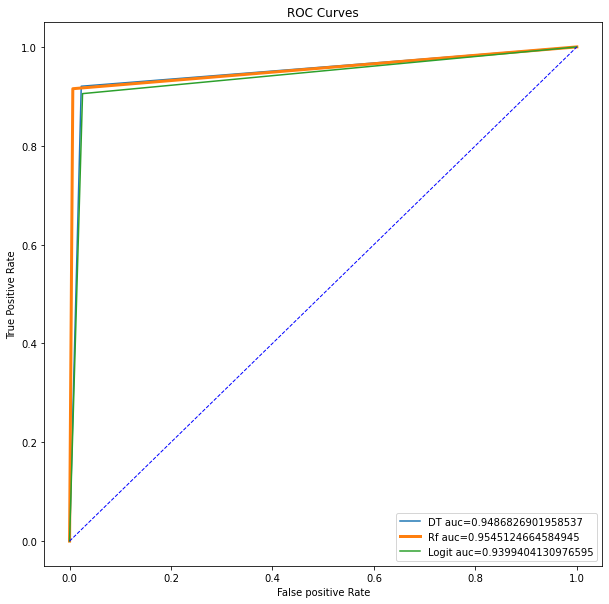

In [145]:
import sklearn.metrics as metrics
fig, ax = plt.subplots(figsize=(10,10))
#Logistic Regression
logit_fpr, logit_tpr, _ = metrics.roc_curve(y_valid,  logit_preds_valid)
logit_auc = metrics.roc_auc_score(y_valid, logit_preds_valid)

#Random Forest
rf_fpr, rf_tpr, _ = metrics.roc_curve(y_valid,  rf_preds_valid)
rf_auc = metrics.roc_auc_score(y_valid, rf_preds_valid)

#Decision Trees
dt_fpr, dt_tpr, _ = metrics.roc_curve(y_valid,  dt_preds_valid)
dt_auc = metrics.roc_auc_score(y_valid, dt_preds_valid)

plt.plot(dt_fpr, dt_tpr, label="DT auc="+str(dt_auc))
plt.plot(rf_fpr, rf_tpr, label="Rf auc="+str(rf_auc), lw=3)
plt.plot(logit_fpr, logit_tpr, label="Logit auc="+str(logit_auc))
plt.plot([0,1],[0,1],color='blue',lw=1,linestyle='--') #lw is line width

plt.xlabel('False positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc=4)


plt.show()
plt.close()

#Depending on how many FP we're willing to accept, our optimal treshold should be along the right side of the orange line.

#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.

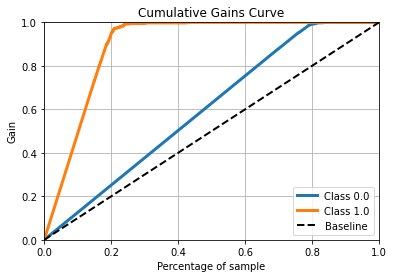

In [144]:
import scikitplot as skplt

rf_preds_proba = rf.predict_proba(X_valid)

skplt.metrics.plot_cumulative_gain(y_valid, rf_preds_proba)

plt.show()
plt.close()

